【課題1】練習のために特徴量とカテゴリを選択

In [87]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data,columns=["sepal_length","sepal_width","petal_length","petal_width"] )
Y = pd.DataFrame(iris.target,columns=["Species"])
df = pd.concat([X,Y],axis=1)

sample_data = df.loc[50:149,["sepal_length","petal_length","Species"]]
print(sample_data)

     sepal_length  petal_length  Species
50            7.0           4.7        1
51            6.4           4.5        1
52            6.9           4.9        1
53            5.5           4.0        1
54            6.5           4.6        1
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        2
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        2

[100 rows x 3 columns]


【問題2】データの分析

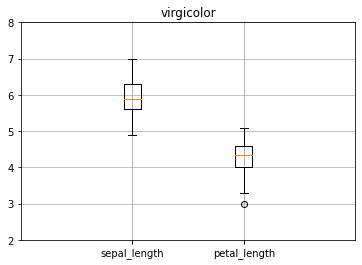

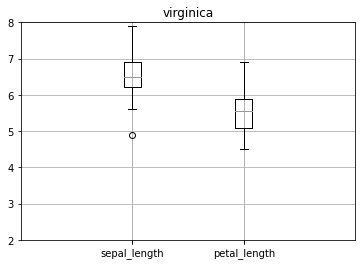

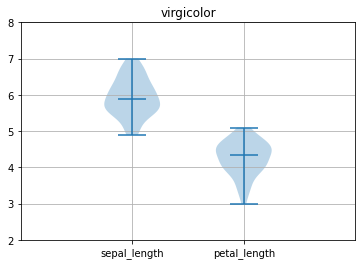

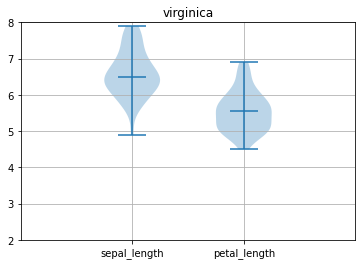

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

sepal_length_list = sample_data.loc[50:99,"sepal_length"]
sepal_length_list2 = sample_data.loc[100:149,"sepal_length"]
petal_length = sample_data.loc[50:99,"petal_length"]
petal_length2 = sample_data.loc[100:149,"petal_length"]
Species_1 =sample_data.loc[50:149,"Species"]

iris_list =(sepal_length_list,petal_length)
iris_list2 =(sepal_length_list2,petal_length2)

#箱ひげ図（boxplot
plt.title("virgicolor")
plt.xticks([1,2],["sepal_length","petal_length"])

plt.ylim([2,8])
plt.xlim([0,3])
plt.grid()
plt.boxplot(iris_list,labels =["sepal_length","petal_length"])  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter

plt.title("virginica")
plt.xticks([1,2],["sepal_length","petal_length"])
plt.ylim([2,8])
plt.xlim([0,3])
plt.grid()
plt.boxplot(iris_list2,labels =["sepal_length","petal_length"])  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter

#バイオリン図（violinplot
plt.title("virgicolor")
plt.xticks([1,2],["sepal_length","petal_length"])
plt.ylim([2,8])
plt.xlim([0,3])
plt.grid()
plt.violinplot(iris_list,showmedians=True)  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter

plt.title("virginica")
plt.xticks([1,2],["sepal_length","petal_length"])
plt.ylim([2,8])
plt.xlim([0,3])
plt.grid()
plt.violinplot(iris_list2,showmedians=True)  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter


【問題3】前処理・訓練データと検証データの分割

In [89]:
from sklearn.model_selection import train_test_split

iris_list_v_v = sample_data.loc[50:149,["sepal_length","petal_length"]]

X = np.array(iris_list_v_v)#iris_list_virginica))
y = np.array(Species_1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train)

[[6.3 4.4]
 [5.2 3.9]
 [5.6 4.5]
 [6.3 5. ]
 [6.4 4.5]
 [6.3 5.1]
 [7.2 5.8]
 [5.6 4.1]
 [6.3 6. ]
 [5.9 4.2]
 [6.7 4.7]
 [5.8 5.1]
 [6.1 4. ]
 [5.8 3.9]
 [5.6 3.9]
 [6.7 5.8]
 [6.3 4.7]
 [6.1 4.7]
 [7.1 5.9]
 [6.1 5.6]
 [5.9 5.1]
 [6.3 4.9]
 [6.  4.5]
 [7.7 6.1]
 [6.  4.8]
 [5.5 4. ]
 [6.6 4.4]
 [6.4 5.5]
 [5.  3.3]
 [7.3 6.3]
 [6.7 5. ]
 [6.7 5.7]
 [6.1 4.9]
 [7.7 6.9]
 [6.2 4.3]
 [6.6 4.6]
 [5.7 3.5]
 [6.7 5.7]
 [7.2 6.1]
 [7.7 6.7]
 [6.5 5.2]
 [5.5 3.7]
 [6.  4. ]
 [6.7 5.2]
 [6.4 5.3]
 [5.7 4.2]
 [6.7 5.6]
 [6.3 4.9]
 [7.6 6.6]
 [6.2 4.8]
 [5.7 4.2]
 [5.8 4. ]
 [5.7 5. ]
 [5.8 5.1]
 [5.7 4.5]
 [6.  5. ]
 [6.  4.5]
 [6.5 5.5]
 [6.7 4.4]
 [6.5 5.8]
 [6.4 4.3]
 [5.5 3.8]
 [6.8 5.5]
 [5.6 4.2]
 [6.2 4.5]
 [6.3 5.6]
 [6.8 5.9]
 [4.9 3.3]
 [5.8 4.1]
 [6.8 4.8]
 [6.9 5.1]
 [6.1 4.6]
 [7.  4.7]
 [5.  3.5]
 [6.9 4.9]]


【問題4】前処理・標準化

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
#print(scaler.mean_)
#print(scaler.var_)
X_train_trasformed= scaler.transform(X_train)
X_test_trasformed= scaler.transform(X_test)
print(X_train_trasformed)
print(X_test_trasformed)

StandardScaler()
[[ 0.04516035 -0.56825437]
 [-1.72899628 -1.18771771]
 [-1.08384841 -0.4443617 ]
 [ 0.04516035  0.17510164]
 [ 0.20644732 -0.4443617 ]
 [ 0.04516035  0.2989943 ]
 [ 1.49674304  1.16624298]
 [-1.08384841 -0.93993237]
 [ 0.04516035  1.41402831]
 [-0.59998751 -0.8160397 ]
 [ 0.69030821 -0.19657637]
 [-0.76127448  0.2989943 ]
 [-0.27741358 -1.06382504]
 [-0.76127448 -1.18771771]
 [-1.08384841 -1.18771771]
 [ 0.69030821  1.16624298]
 [ 0.04516035 -0.19657637]
 [-0.27741358 -0.19657637]
 [ 1.33545608  1.29013565]
 [-0.27741358  0.91845764]
 [-0.59998751  0.2989943 ]
 [ 0.04516035  0.05120897]
 [-0.43870055 -0.4443617 ]
 [ 2.30317787  1.53792098]
 [-0.43870055 -0.0726837 ]
 [-1.24513538 -1.06382504]
 [ 0.52902125 -0.56825437]
 [ 0.20644732  0.79456498]
 [-2.05157021 -1.93107371]
 [ 1.65803001  1.78570632]
 [ 0.69030821  0.17510164]
 [ 0.69030821  1.04235031]
 [-0.27741358  0.05120897]
 [ 2.30317787  2.52906232]
 [-0.11612662 -0.69214704]
 [ 0.52902125 -0.32046903]
 [-0.922561

【問題5】学習と推定

In [91]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_trasformed, y_train)
print(neigh.predict([[-1,-1]]))
print(neigh.predict_proba([[1,1]]))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_trasformed, y_train)
print(neigh.predict([[-1,-1]]))
print(neigh.predict_proba([[1,1]]))

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_trasformed, y_train)
print(neigh.predict([[-1,-1]]))
print(neigh.predict_proba([[1,1]]))

[1]
[[0. 1.]]
[1]
[[0. 1.]]
[1]
[[0. 1.]]


【問題6】評価

scikit-learnを使い4種類の指標を計算する

Accuracy（正解率）

In [92]:
#Accuracy（正解率）
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_trasformed, y_train)

y_pred = neigh.predict(X_test_trasformed)
y_true = y_test
print(y_true)
print(y_pred)
metrics.accuracy_score(y_true, y_pred)


[2 2 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1]
[2 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 1 1 2 1 1 2]


0.88

Precision（適合率）

In [93]:
#Precision（適合率)
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average='macro')
precision_score(y_true, y_pred, average='micro')
precision_score(y_true, y_pred, average='weighted')
precision_score(y_true, y_pred, average=None)
precision_score(y_true, y_pred, average=None)
precision_score(y_true, y_pred, average=None, zero_division=1)

print(precision_score(y_true, y_pred, average='macro'))

0.8819444444444444


Recall（再現率) 

In [94]:
#Recall（再現率)
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, average='macro')
recall_score(y_true, y_pred, average='weighted')
recall_score(y_true, y_pred, average=None)
recall_score(y_true, y_pred, average=None)
recall_score(y_true, y_pred, average=None, zero_division=1)

print(recall_score(y_true, y_pred, average='macro'))

0.8666666666666667


F値 

In [95]:
#F値
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average='macro')
f1_score(y_true, y_pred, average='micro')
f1_score(y_true, y_pred, average='weighted')
f1_score(y_true, y_pred, average=None)
f1_score(y_true, y_pred, zero_division=1)
print(f1_score(y_true, y_pred, average='macro'))

0.8726655348047538


混同行列をscikit-learnを使い表示する

In [96]:
#混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

[[ 8  2]
 [ 1 14]]


4種類の指標値の意味について簡単に調査して文章でまとめる

正解率とは、全予測を母数とし、正しい予測をした割合

適合率とは、予測で正と判断した数を母数とし、実際に正だった場合の割合

再現率とは、実際の正の数を母数とした時の予測が正だった割合

F値とは適合率と再現率の調和平均

【問題7】可視化

In [97]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
#
#
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



confusion matrix = 
 [[ 8  2]
 [ 1 14]]
accuracy =  0.88
precision =  0.8888888888888888
recall =  0.8
f1 score =  0.8421052631578948
                   1          2  accuracy  macro avg  weighted avg
precision   0.888889   0.875000      0.88   0.881944      0.880556
recall      0.800000   0.933333      0.88   0.866667      0.880000
f1-score    0.842105   0.903226      0.88   0.872666      0.878778
support    10.000000  15.000000      0.88  25.000000     25.000000


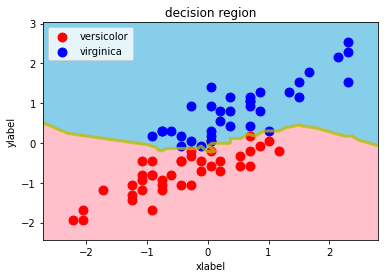

In [98]:
print('confusion matrix = \n', confusion_matrix(y_true, y_pred))
print('accuracy = ', accuracy_score(y_true, y_pred))
print('precision = ', precision_score(y_true, y_pred))
print('recall = ', recall_score(y_true, y_pred))
print('f1 score = ', f1_score(y_true, y_pred))

d = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(d)
print(df)


decision_region(X_train_trasformed,y_train,model=neigh,step=0.01,title='decision region',xlabel='xlabel',ylabel='ylabel',target_names=['versicolor', 'virginica'])

【問題8】他の手法の学習

ロジスティック回帰

confusion matrix = 
 [[ 9  1]
 [ 1 14]]
accuracy =  0.92
precision =  0.9
recall =  0.9
f1 score =  0.9
              1          2  accuracy  macro avg  weighted avg
precision   0.9   0.933333      0.92   0.916667          0.92
recall      0.9   0.933333      0.92   0.916667          0.92
f1-score    0.9   0.933333      0.92   0.916667          0.92
support    10.0  15.000000      0.92  25.000000         25.00


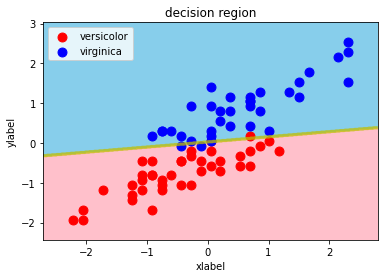

In [99]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train_trasformed, y_train)
y_true = y_test
y_pred = clf.predict(X_test_trasformed)
clf.predict(X_train_trasformed)
clf.predict_proba(X_train_trasformed)
clf.score(X_train_trasformed, y_train)

print('confusion matrix = \n', confusion_matrix(y_true, y_pred))
print('accuracy = ', accuracy_score(y_true, y_pred))
print('precision = ', precision_score(y_true, y_pred))
print('recall = ', recall_score(y_true, y_pred))
print('f1 score = ', f1_score(y_true, y_pred))

d1 = classification_report(y_true, y_pred, output_dict=True)
df1 = pd.DataFrame(d1)
print(df1)

decision_region(X_train_trasformed, y_train, model=clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


SVM

confusion matrix = 
 [[ 8  2]
 [ 1 14]]
accuracy =  0.88
precision =  0.8888888888888888
recall =  0.8
f1 score =  0.8421052631578948
                   1          2  accuracy  macro avg  weighted avg
precision   0.888889   0.875000      0.88   0.881944      0.880556
recall      0.800000   0.933333      0.88   0.866667      0.880000
f1-score    0.842105   0.903226      0.88   0.872666      0.878778
support    10.000000  15.000000      0.88  25.000000     25.000000


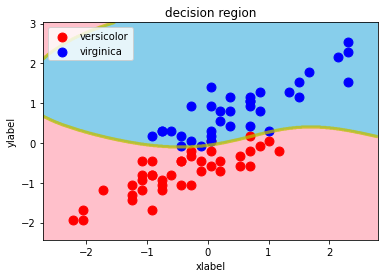

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf1.fit(X_train_trasformed, y_train)
y_true = y_test
y_pred = clf1.predict(X_test_trasformed)


print('confusion matrix = \n', confusion_matrix(y_true, y_pred))
print('accuracy = ', accuracy_score(y_true, y_pred))
print('precision = ', precision_score(y_true, y_pred))
print('recall = ', recall_score(y_true, y_pred))
print('f1 score = ', f1_score(y_true, y_pred))

d2 = classification_report(y_true, y_pred, output_dict=True)
df2 = pd.DataFrame(d2)
print(df2)

decision_region(X_train_trasformed, y_train, model=clf1, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


決定木

confusion matrix = 
 [[ 8  2]
 [ 1 14]]
accuracy =  0.88
precision =  0.8888888888888888
recall =  0.8
f1 score =  0.8421052631578948
                   1          2  accuracy  macro avg  weighted avg
precision   0.888889   0.875000      0.88   0.881944      0.880556
recall      0.800000   0.933333      0.88   0.866667      0.880000
f1-score    0.842105   0.903226      0.88   0.872666      0.878778
support    10.000000  15.000000      0.88  25.000000     25.000000


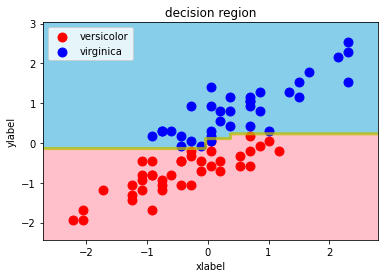

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train_trasformed, y_train)
cross_val_score(clf2, X_train_trasformed, y_train, cv=10)
y_true = y_test
y_pred = clf2.predict(X_test_trasformed)


print('confusion matrix = \n', confusion_matrix(y_true, y_pred))
print('accuracy = ', accuracy_score(y_true, y_pred))
print('precision = ', precision_score(y_true, y_pred))
print('recall = ', recall_score(y_true, y_pred))
print('f1 score = ', f1_score(y_true, y_pred))

d3 = classification_report(y_true, y_pred, output_dict=True)
df3 = pd.DataFrame(d3)
print(df3)

decision_region(X_train_trasformed, y_train, model=clf2, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
      


ランダムフォレスト

confusion matrix = 
 [[ 8  2]
 [ 2 13]]
accuracy =  0.84
precision =  0.8
recall =  0.8
f1 score =  0.8000000000000002
              1          2  accuracy  macro avg  weighted avg
precision   0.8   0.866667      0.84   0.833333          0.84
recall      0.8   0.866667      0.84   0.833333          0.84
f1-score    0.8   0.866667      0.84   0.833333          0.84
support    10.0  15.000000      0.84  25.000000         25.00


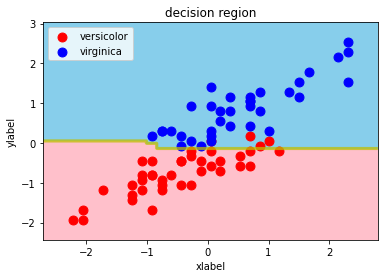

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train_trasformed, y_train)
y_true = y_test
y_pred = clf3.predict(X_test_trasformed)


print('confusion matrix = \n', confusion_matrix(y_true, y_pred))
print('accuracy = ', accuracy_score(y_true, y_pred))
print('precision = ', precision_score(y_true, y_pred))
print('recall = ', recall_score(y_true, y_pred))
print('f1 score = ', f1_score(y_true, y_pred))

d4 = classification_report(y_true, y_pred, output_dict=True)
df4 = pd.DataFrame(d4)
print(df4)

decision_region(X_train_trasformed, y_train, model=clf3, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

In [ ]:
最近傍法　　　　　　:空間における最も近い訓練例に基づいた分類の手法
ロジスティック回帰   :２値の場合だと信頼性が増す
SVM                       :２つのグループ間の最も距離の離れた箇所（最大マージン）を見つけ出し、その真ん中に識別の線を引く。
決定木                     :分類を細かく判断し、微調整しながら境界を決めている
ランダムフォレスト    :大量のデータを必要とするが、精度の高い予測/分類を行える